In [1]:
from split_environment import BlackjackEnv
from basic_strategy_agent import BasicStrategyAgent
from split_train_agent import evaluate_agent
from Supervised_betting import collect_dictionary
from Supervised_betting import evaluate_nn_betting_agent
from BettingModel import train_betting_nn
from HiloAgent import HiLoBettingAgent

count_type = "full"
env = BlackjackEnv(count_type = "full")
agent = BasicStrategyAgent()

#model = HiLoBettingAgent(base_bet=1, max_units=100)

dictionary = collect_dictionary(agent, env, count_type, 10000)
print(dictionary)
betting = train_betting_nn(dictionary, 'full', batch_size=29)

#model = train_betting_nn(dictionary, count_type, batch_size=64, epochs=1000)
#evaluate_nn_betting_agent(model, agent, env, count_type=count_type, episodes = 100000, max_bet = 100, min_bet = 1)

Episode 1000/10000 — Last Reward: -1.00 — Count State: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Episode 2000/10000 — Last Reward: 0.00 — Count State: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Episode 3000/10000 — Last Reward: -1.00 — Count State: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Episode 4000/10000 — Last Reward: 1.00 — Count State: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Episode 5000/10000 — Last Reward: -1.00 — Count State: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Episode 6000/10000 — Last Reward: -2.00 — Count State: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Episode 7000/10000 — Last Reward: 2.00 — Count State: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Episode 8000/10000 — Last Reward: 1.00 — Count State: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Episode 9000/10000 — Last Reward: 1.00 — Count State: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Episode 10000/10000 — Last Reward: -1.00 — Count St

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 128])

In [ ]:
from split_environment import BlackjackEnv
from split_train_agent import train_agent, evaluate_agent
from Supervised_betting import collect_dictionary, evaluate_nn_betting_agent
from DQNAgent import DQNAgent
from BettingModel import train_betting_nn

# Strategy setup
COUNT_TYPES = ["hi_lo", "zen", "uston_apc", "ten_count"]
TRAIN_EPISODES = 5000
DICT_EPISODES = 50000
EVAL_EPISODES = 10000

# Result storage
summary = []

for ct in COUNT_TYPES:
    print(f"\n==============================")
    print(f"→ Training & evaluating: {ct}")

    # Step 1: Train playing agent
    agent = DQNAgent(count_type=ct)
    agent, env = train_agent(agent, episodes=TRAIN_EPISODES, count_type=ct, print_every=2000)

    # Step 2: Evaluate no-betting
    print("→ Evaluating without betting...")
    wins = 0
    losses = 0
    pushes = 0
    total_reward = 0
    for _ in range(EVAL_EPISODES):
        done = 0
        state, _, done = env.reset()
        while done != 2:
            action = agent.act(state)
            state, _, done = env.step(action)
        reward = sum(env.deliver_rewards())
        total_reward += reward
        if reward > 0: wins += 1
        elif reward < 0: losses += 1
        else: pushes += 1

    win_rate = wins / EVAL_EPISODES
    loss_rate = losses / EVAL_EPISODES
    push_rate = pushes / EVAL_EPISODES
    avg_reward = total_reward / EVAL_EPISODES

    # Step 3: Dictionary and train betting model
    print("→ Training betting model...")
    dictionary = collect_dictionary(agent, env, ct, num_episodes=DICT_EPISODES)
    betting_model = train_betting_nn(dictionary, count_type=ct, batch_size=64, epochs=100, sample_size=10000)

    # Step 4: Evaluate with betting
    print("→ Evaluating with betting...")
    profit_with_bet = evaluate_nn_betting_agent(betting_model, agent, env, ct, episodes=EVAL_EPISODES)

    # Save results
    summary.append((ct, win_rate, loss_rate, push_rate, avg_reward, profit_with_bet))

# Step 5: Print final table
print("\n=================== FINAL RESULTS ===================")
print(f"{'Strategy':<12} {'Win Rate':>9} {'Loss Rate':>10} {'Push Rate':>10} {'Avg Rwd':>10} {'Bet Profit':>12}")
print("-" * 66)
for ct, wr, lr, pr, avg_rwd, profit in summary:
    print(f"{ct:<12} {wr:9.4f} {lr:10.4f} {pr:10.4f} {avg_rwd:10.4f} {profit:12.4f}")



→ Training & evaluating: hi_lo
Episode: 0/5000, Epsilon: 1.00, Loss: 0.0000, Bankroll: 1002, Reward: 2
Model saved to final_models_dc_2/blackjack_agent_finished_model_hi_lo.pth
Episode: 2000/5000, Epsilon: 0.22, Loss: 0.9943, Bankroll: 274, Reward: -1
Episode: 4000/5000, Epsilon: 0.05, Loss: 0.7567, Bankroll: -93, Reward: -1
→ Evaluating without betting...
→ Training betting model...
Episode 1000/50000 — Last Reward: -1.00 — Count State: (-2.0,)
Episode 2000/50000 — Last Reward: 1.00 — Count State: (-1.0,)
Episode 3000/50000 — Last Reward: 1.00 — Count State: (-4.0,)
Episode 4000/50000 — Last Reward: -1.00 — Count State: (2.0,)
Episode 5000/50000 — Last Reward: -1.00 — Count State: (7.0,)
Episode 6000/50000 — Last Reward: 0.00 — Count State: (0.0,)
Episode 7000/50000 — Last Reward: 1.00 — Count State: (0.0,)
Episode 8000/50000 — Last Reward: -1.00 — Count State: (-1.0,)
Episode 9000/50000 — Last Reward: -1.00 — Count State: (0.0,)
Episode 10000/50000 — Last Reward: -1.00 — Count State


→ Training and evaluating: hi_lo
Episode: 0/10000, Epsilon: 1.00, Loss: 0.0000, Bankroll: 1002, Reward: 2
Model saved to final_models_dc_2/blackjack_agent_finished_model_hi_lo.pth
Episode: 2000/10000, Epsilon: 0.47, Loss: 1.0405, Bankroll: 130, Reward: -1
Episode: 4000/10000, Epsilon: 0.22, Loss: 0.8799, Bankroll: -453, Reward: 0
Episode: 6000/10000, Epsilon: 0.10, Loss: 0.7568, Bankroll: -772, Reward: 1
Episode: 8000/10000, Epsilon: 0.05, Loss: 0.7133, Bankroll: -1016, Reward: 1
→ Collecting cumulative rewards (no betting)...
→ Training betting model...
Episode 1000/500000 — Last Reward: 1.00 — Count State: (-2.0,)
Episode 2000/500000 — Last Reward: 1.00 — Count State: (1.0,)
Episode 3000/500000 — Last Reward: -1.00 — Count State: (2.0,)
Episode 4000/500000 — Last Reward: 1.00 — Count State: (-6.0,)
Episode 5000/500000 — Last Reward: 1.00 — Count State: (0.0,)
Episode 6000/500000 — Last Reward: -1.00 — Count State: (-2.0,)
Episode 7000/500000 — Last Reward: 1.00 — Count State: (3.0,)

Text(0.5, 1.0, 'Cumulative Profit/Loss Comparison (Betting vs. Non-Betting)')

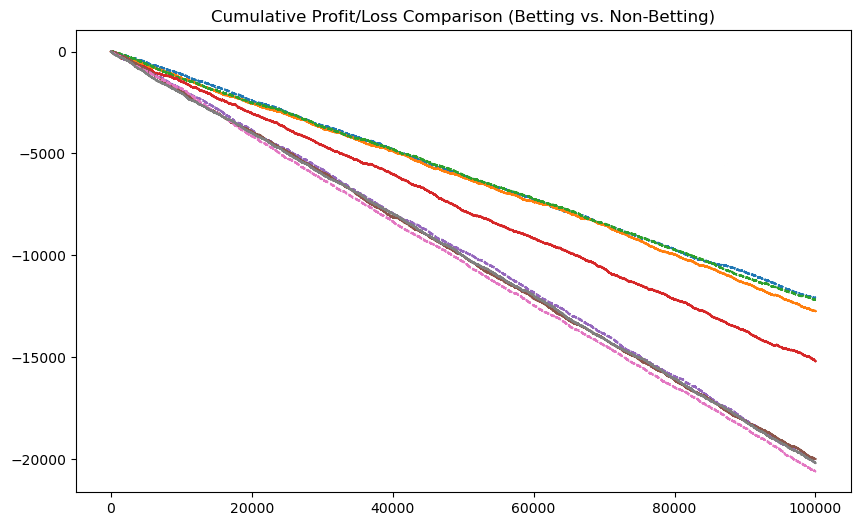

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from split_environment import BlackjackEnv
from split_train_agent import train_agent
from Supervised_betting import collect_dictionary
from DQNAgent import DQNAgent
from BettingModel import train_betting_nn
import torch

COUNT_TYPES = ["hi_lo", "zen", "uston_apc", "ten_count"]
TRAIN_EPISODES = 10000
DICT_EPISODES = 500000
EVAL_EPISODES = 100000
BASE_BET = 1

results = {}  # Store all cumulative rewards/profits

for ct in COUNT_TYPES:
    try:
        print(f"\n→ Training and evaluating: {ct}")

        # Step 1: Train DQN agent
        agent = DQNAgent(count_type=ct)
        agent, env = train_agent(agent, episodes=TRAIN_EPISODES, count_type=ct, print_every=2000)

        # Step 2: Evaluate without betting
        print("→ Collecting cumulative rewards (no betting)...")
        cumulative_rewards = []
        total_reward = 0
        for _ in range(EVAL_EPISODES):
            done = 0
            state, _, done = env.reset()
            while done != 2:
                action = agent.act(state)
                state, _, done = env.step(action)
            reward = sum(env.deliver_rewards())
            total_reward += reward * BASE_BET
            cumulative_rewards.append(total_reward)

        # Step 3: Collect dictionary and train betting model
        print("→ Training betting model...")
        dictionary = collect_dictionary(agent, env, ct, num_episodes=DICT_EPISODES)
        betting_model = train_betting_nn(dictionary, count_type=ct, batch_size=64, epochs=100, sample_size=10000)

        # Step 4: Evaluate with betting
        print("→ Collecting cumulative profit (with betting)...")
        device = "cuda" if torch.cuda.is_available() else "cpu"
        betting_model.to(device)

        cumulative_profit = []
        total_profit = 0
        for _ in range(EVAL_EPISODES):
            state, _, _ = env.reset()
            cards_rem = env.decks_remaining()

            # Get count state for betting
            if ct == "hi_lo":
                betting_state = [env.hi_lo_count/cards_rem]
            elif ct == "zen":
                betting_state = [env.zen_count/cards_rem]
            elif ct == "uston_apc":
                betting_state = [env.uston_apc_count/cards_rem]
            elif ct == "ten_count":
                betting_state = [env.ten_count_count/cards_rem]
            elif ct == "comb_counts":
                betting_state = [env.hi_lo_count/cards_rem, env.zen_count/cards_rem, env.uston_apc_count/cards_rem, env.ten_count_count/cards_rem]
            elif ct == "full":
                betting_state = env._get_full_count_state()

            betting_state = torch.tensor(betting_state, dtype=torch.float32).unsqueeze(0).to(device)
            with torch.no_grad():
                win_prob = betting_model(betting_state).item()

            # Kelly formula
            b = 1
            p = win_prob
            q = 1 - p
            kelly_fraction = max((b * p - q) / b, 0)
            bet_size = max(1, round(min(kelly_fraction, 1) * 100))

            done = 0
            while done != 2:
                action = agent.act(state)
                state, _, done = env.step(action)

            reward = sum(env.deliver_rewards())
            total_profit += reward * bet_size
            cumulative_profit.append(total_profit)

        # Store data
        results[ct] = {
            "episodes": np.arange(1, EVAL_EPISODES + 1),
            "no_betting": cumulative_rewards,
            "with_betting": cumulative_profit,
        }

    except Exception as e:
        print(f"❌ Skipping {ct} due to error: {e}")

# ---------- Plotting ----------
plt.figure(figsize=(10, 6))

for ct, data in results.items():
    plt.plot(data["episodes"], data["no_betting"], label=f"{ct} - No Betting", linestyle='--')
    plt.plot(data["episodes"], data["with_betting"], label=f"{ct} - With Betting", linestyle='-')

plt.title("Cumulative Profit/Loss Comparison (Betting vs. Non-Betting)")


In [19]:
import numpy as np
import pandas as pd

# Build summary table
rows = []
for ct, data in results.items():
    # no‐bet per‐hand rewards
    cum_no = np.array(data["no_betting"])
    rewards = np.diff(np.concatenate([[0], cum_no]))
    win_rate = np.mean(rewards > 0)
    avg_reward = np.mean(rewards)

    # with‐bet per‐hand profits
    cum_bet = np.array(data["with_betting"])
    profits = np.diff(np.concatenate([[0], cum_bet]))
    win_rate_bet = np.mean(profits > 0)
    avg_profit = np.mean(profits)

    rows.append({
        "Strategy": ct,
        "Win Rate": f"{win_rate:.4f}",
        "Win Rate + Betting": f"{win_rate_bet:.4f}",
        "Avg Reward": f"{avg_reward:.4f}",
        "Avg Profit + Betting": f"{avg_profit:.4f}"
    })

df = pd.DataFrame(rows).set_index("Strategy")
print("\n=================== FINAL RESULTS ===================")
print(df.to_string())


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 0 dimension(s)

ValueError: x, y, and format string must not be None

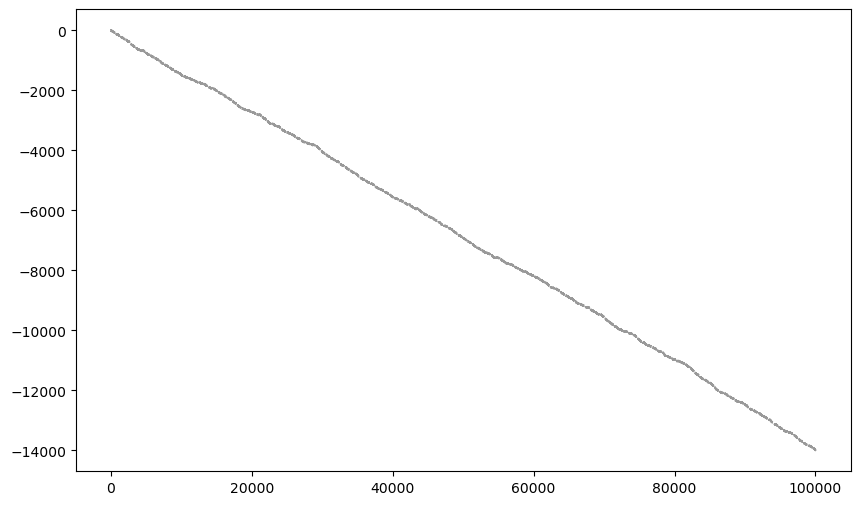

In [18]:
import matplotlib.colors as mcolors

# Define one base color per count type
base_colors = {
    "hi_lo": "#1f77b4",      # Blue
    "zen": "#ff7f0e",        # Orange
    "uston_apc": "#2ca02c",  # Green
    "ten_count": "#d62728",  # Red
}

plt.figure(figsize=(10, 6))

for ct, data in results.items():
    color = base_colors.get(ct, "#000000")  # fallback to black if missing

    # Plot no-betting in lighter shade
    light_color = mcolors.to_rgba(color, alpha=0.4)
    plt.plot(data["episodes"], data["no_betting"], linestyle='--', label=f"{ct} - No Betting", color=light_color)

    # Plot with-betting in strong shade
    plt.plot(data["episodes"], data["with_betting"], linestyle='-', label=f"{ct} - With Betting", color=color)

    # Annotate final point
    final_x = data["episodes"][-1]
    final_y = data["with_betting"][-1]
    plt.text(final_x, final_y, ct, fontsize=9, va='center', ha='left', color=color)

plt.title("Cumulative Profit/Loss Comparison (Betting vs. Non-Betting)")
plt.xlabel("Episode")
plt.ylabel("Cumulative Profit")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from split_environment import BlackjackEnv
from split_train_agent import train_agent
from Supervised_betting import collect_dictionary
from DQNAgent import DQNAgent
from BettingModel import train_betting_nn

# Configuration
COUNT_TYPES    = ["hi_lo", "zen", "uston_apc", "ten_count"]
TRAIN_EPISODES = 10000
DICT_EPISODES  = 100000
EVAL_EPISODES  = 100000
BASE_BET       = 1

results = {}

# 1) Train one full‐state playing agent
print("\n→ Training full playing agent (count_type='full')")
playing_agent = DQNAgent(count_type="full")
playing_agent, _ = train_agent(
    agent=playing_agent,
    episodes=TRAIN_EPISODES,
    count_type="full",
    print_every=200
)

# 2) Evaluate baseline (no betting)
print("→ Collecting baseline (no‐bet) cumulative rewards...")
env = BlackjackEnv(count_type="full")
baseline = []
cum = 0
for _ in range(EVAL_EPISODES):
    done = 0
    state, _, done = env.reset()
    while done != 2:
        action = playing_agent.act(state)
        state, _, done = env.step(action)
    r = sum(env.deliver_rewards())
    cum += r * BASE_BET
    baseline.append(cum)

results["full"] = {
    "episodes": np.arange(1, EVAL_EPISODES+1),
    "no_betting": baseline,
    "with_betting": None
}

# 3) For each count type: train betting model & evaluate combined profit
for ct in COUNT_TYPES:
    print(f"\n→ Betting model for count_type='{ct}'")
    # build dictionary from the same env (it tracks all counts internally)
    dictionary = collect_dictionary(playing_agent, env, ct, num_episodes=DICT_EPISODES)

    betting_model = train_betting_nn(
        dictionary=dictionary,
        count_type=ct,
        batch_size=64,
        epochs=100,
        sample_size=10000
    )
    betting_model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

    print("→ Evaluating combined profit (with betting)...")
    cum_profit = []
    prof = 0
    for _ in range(EVAL_EPISODES):
        # reset full env (it also resets counts)
        done = 0
        state, _, done = env.reset()

        # extract the count feature from env
        decks = env.decks_remaining()
        if ct == "hi_lo":
            count_val = env.hi_lo_count / decks
        elif ct == "zen":
            count_val = env.zen_count / decks
        elif ct == "uston_apc":
            count_val = env.uston_apc_count / decks
        else:  # ten_count
            count_val = env.ten_count_count / decks

        # compute bet size via betting_model + Kelly
        inp = torch.tensor([[count_val]], dtype=torch.float32).to(betting_model.model[0].weight.device)
        with torch.no_grad():
            p = betting_model(inp).item()
        q = 1 - p
        kelly = max((p - q), 0)
        bet_size = max(1, round(min(kelly,1) * 100))

        # play out hand
        while done != 2:
            action = playing_agent.act(state)
            state, _, done = env.step(action)

        r = sum(env.deliver_rewards())
        prof += r * bet_size
        cum_profit.append(prof)

    results[ct] = {
        "episodes": np.arange(1, EVAL_EPISODES+1),
        "no_betting": None,
        "with_betting": cum_profit
    }

# 4) Plot all curves together
plt.figure(figsize=(10,6))
for ct, data in results.items():
    ep = data["episodes"]
    if data["no_betting"] is not None:
        plt.plot(ep, data["no_betting"], '--', label=f"{ct} baseline")
    if data["with_betting"] is not None:
        plt.plot(ep, data["with_betting"], '-', label=f"{ct} + betting")

plt.title("Cumulative Profit/Loss – Full Playing Agent vs. Betting Models")
plt.xlabel("Episode")
plt.ylabel("Cumulative Profit")
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



→ Training full playing agent (count_type='full')
Episode: 0/10000, Epsilon: 1.00, Loss: 0.0000, Bankroll: 999, Reward: -1
Model saved to final_models_dc_2/blackjack_agent_finished_model_full.pth
Episode: 200/10000, Epsilon: 0.93, Loss: 1.0027, Bankroll: 887, Reward: -2
Episode: 400/10000, Epsilon: 0.86, Loss: 1.0843, Bankroll: 760, Reward: -2
Episode: 600/10000, Epsilon: 0.79, Loss: 1.0035, Bankroll: 656, Reward: -1
Episode: 800/10000, Epsilon: 0.74, Loss: 0.9970, Bankroll: 544, Reward: -1
Episode: 1000/10000, Epsilon: 0.68, Loss: 0.9641, Bankroll: 482, Reward: 1
Episode: 1200/10000, Epsilon: 0.63, Loss: 1.0843, Bankroll: 405, Reward: 0
Episode: 1400/10000, Epsilon: 0.58, Loss: 1.0951, Bankroll: 308, Reward: 2
Episode: 1600/10000, Epsilon: 0.54, Loss: 1.0513, Bankroll: 253, Reward: 1
Episode: 1800/10000, Epsilon: 0.50, Loss: 0.9838, Bankroll: 154, Reward: -1
Episode: 2000/10000, Epsilon: 0.46, Loss: 0.9317, Bankroll: 86, Reward: -1
Episode: 2200/10000, Epsilon: 0.43, Loss: 0.9209, Ba

KeyboardInterrupt: 


→ Training full playing agent (count_type='full')
Episode: 0/100000, Epsilon: 1.00, Loss: 0.0000, Bankroll: 1001, Reward: 1
Model saved to final_models_dc_2/blackjack_agent_finished_model_full.pth
Episode: 2000/100000, Epsilon: 0.93, Loss: 1.0916, Bankroll: -37, Reward: -3
Episode: 4000/100000, Epsilon: 0.86, Loss: 1.0890, Bankroll: -1059, Reward: -1
Episode: 6000/100000, Epsilon: 0.80, Loss: 1.0289, Bankroll: -1967, Reward: -1
Episode: 8000/100000, Epsilon: 0.74, Loss: 0.9651, Bankroll: -2902, Reward: -1
Episode: 10000/100000, Epsilon: 0.68, Loss: 0.8801, Bankroll: -3786, Reward: -1
Episode: 12000/100000, Epsilon: 0.63, Loss: 0.9000, Bankroll: -4658, Reward: -1
Episode: 14000/100000, Epsilon: 0.59, Loss: 0.8302, Bankroll: -5467, Reward: 0
Episode: 16000/100000, Epsilon: 0.54, Loss: 0.8504, Bankroll: -6054, Reward: -1
Episode: 18000/100000, Epsilon: 0.50, Loss: 0.9012, Bankroll: -6789, Reward: 1
Episode: 20000/100000, Epsilon: 0.47, Loss: 0.8072, Bankroll: -7494, Reward: 1
Episode: 24

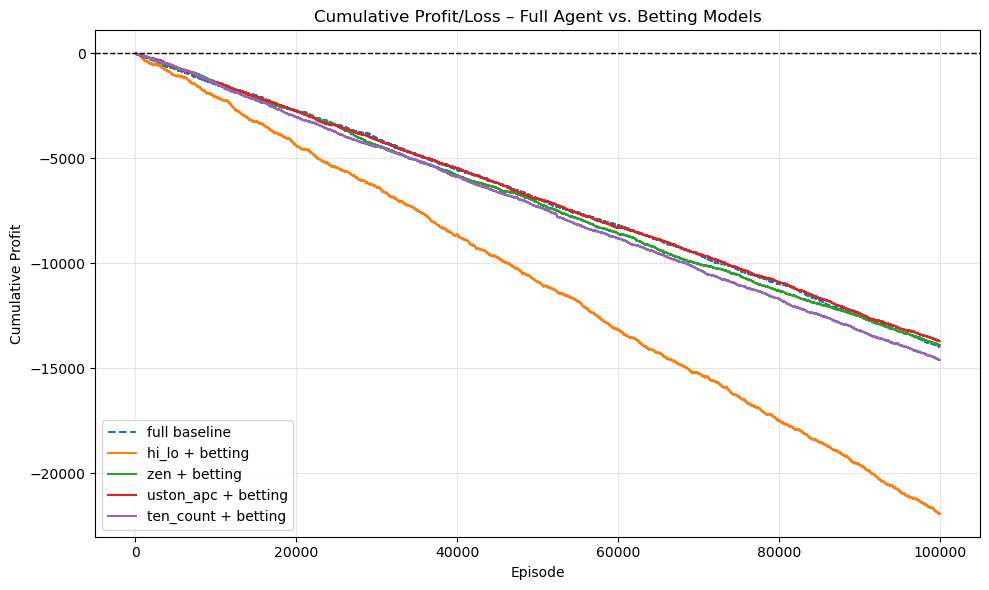


=================== FINAL RESULTS ===================
Strategy      Win Rate  Loss Rate  Push Rate    Avg Rwd
--------------------------------------------------------
full            0.3611     0.4925     0.1463    -0.1400
hi_lo           0.3615     0.4926     0.1459    -0.2193
zen             0.3617     0.4901     0.1483    -0.1391
uston_apc       0.3617     0.4909     0.1474    -0.1371
ten_count       0.3575     0.4941     0.1484    -0.1461


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd

from split_environment import BlackjackEnv
from split_train_agent import train_agent
from Supervised_betting import collect_dictionary
from DQNAgent import DQNAgent
from BettingModel import train_betting_nn

# Configuration
COUNT_TYPES    = ["hi_lo", "zen", "uston_apc", "ten_count"]
TRAIN_EPISODES = 100000
DICT_EPISODES  = 100000
EVAL_EPISODES  = 100000
BASE_BET       = 1

# 1) Train one full‐state playing agent
print("\n→ Training full playing agent (count_type='full')")
playing_agent = DQNAgent(count_type="full")
playing_agent, _ = train_agent(
    agent=playing_agent,
    episodes=TRAIN_EPISODES,
    count_type="full",
    print_every=2000
)

# 2) Baseline (full) metrics
print("→ Evaluating baseline (no betting)")
env_full = BlackjackEnv(count_type="full")
cum_rewards = []
wins_f = losses_f = pushes_f = 0
total_r = 0
for _ in range(EVAL_EPISODES):
    done = 0
    state, _, done = env_full.reset()
    while done != 2:
        action = playing_agent.act(state)
        state, _, done = env_full.step(action)
    r = sum(env_full.deliver_rewards())
    total_r += r * BASE_BET
    cum_rewards.append(total_r)
    if r > 0: wins_f += 1
    elif r < 0: losses_f += 1
    else: pushes_f += 1

win_rate_f = wins_f/EVAL_EPISODES
loss_rate_f = losses_f/EVAL_EPISODES
push_rate_f = pushes_f/EVAL_EPISODES
avg_reward_f = total_r/EVAL_EPISODES

# store baseline
results = {"full": {
    "episodes": np.arange(1, EVAL_EPISODES+1),
    "no_betting": cum_rewards,
    "with_betting": None
}}

# prepare summary list
summary = [("full", win_rate_f, loss_rate_f, push_rate_f, avg_reward_f)]

# 3) For each count type: train betting & evaluate
for ct in COUNT_TYPES:
    print(f"\n→ Betting model for count_type='{ct}'")
    # collect dictionary
    dictionary = collect_dictionary(playing_agent, env_full, ct, num_episodes=DICT_EPISODES)
    # train betting model
    betting_model = train_betting_nn(dictionary, count_type=ct, batch_size=64, epochs=100000, sample_size=10000)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    betting_model.to(device)

    # evaluate combined
    cum_profit = []
    wins_b = losses_b = pushes_b = 0
    total_p = 0
    for _ in range(EVAL_EPISODES):
        done = 0
        state, _, done = env_full.reset()
        # extract count feature
        decks = env_full.decks_remaining()
        if ct == "hi_lo":
            cv = env_full.hi_lo_count / decks
        elif ct == "zen":
            cv = env_full.zen_count / decks
        elif ct == "uston_apc":
            cv = env_full.uston_apc_count / decks
        else:  # ten_count
            cv = env_full.ten_count_count / decks

        inp = torch.tensor([[cv]], dtype=torch.float32).to(device)
        with torch.no_grad():
            p = betting_model(inp).item()
        q = 1 - p
        kelly = max((p - q), 0)
        bet_size = max(1, round(min(kelly,1)*100))

        # play hand
        done = 0
        while done != 2:
            action = playing_agent.act(state)
            state, _, done = env_full.step(action)
        r = sum(env_full.deliver_rewards())
        total_p += r * bet_size
        cum_profit.append(total_p)
        if r*bet_size > 0: wins_b += 1
        elif r*bet_size < 0: losses_b += 1
        else: pushes_b += 1

    win_rate_b = wins_b/EVAL_EPISODES
    loss_rate_b = losses_b/EVAL_EPISODES
    push_rate_b = pushes_b/EVAL_EPISODES
    avg_profit_b = total_p/EVAL_EPISODES

    results[ct] = {
        "episodes": np.arange(1, EVAL_EPISODES+1),
        "no_betting": None,
        "with_betting": cum_profit
    }
    summary.append((ct, win_rate_b, loss_rate_b, push_rate_b, avg_profit_b))

# 4) Plot all curves
plt.figure(figsize=(10,6))
for name,data in results.items():
    ep = data["episodes"]
    if data["no_betting"] is not None:
        plt.plot(ep, data["no_betting"], '--', label=f"{name} baseline")
    if data["with_betting"] is not None:
        plt.plot(ep, data["with_betting"], '-', label=f"{name} + betting")
plt.title("Cumulative Profit/Loss – Full Agent vs. Betting Models")
plt.xlabel("Episode")
plt.ylabel("Cumulative Profit")
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 5) Print summary table (no 'Bet Profit' column)
print("\n=================== FINAL RESULTS ===================")
print(f"{'Strategy':<12} {'Win Rate':>9} {'Loss Rate':>10} {'Push Rate':>10} {'Avg Rwd':>10}")
print("-"*56)
for name, wr, lr, pr, avg in summary:
    print(f"{name:<12} {wr:9.4f} {lr:10.4f} {pr:10.4f} {avg:10.4f}")


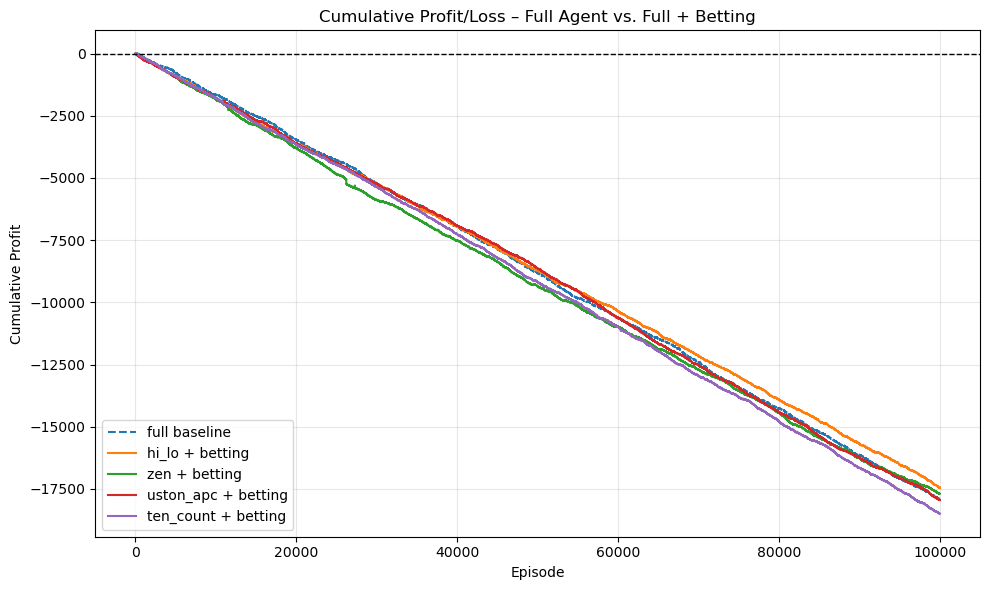

In [15]:
plt.figure(figsize=(10,6))
for name,data in results.items():
    ep = data["episodes"]
    if data["no_betting"] is not None:
        plt.plot(ep, data["no_betting"], '--', label=f"{name} baseline")
    if data["with_betting"] is not None:
        plt.plot(ep, data["with_betting"], '-', label=f"{name} + betting")
plt.title("Cumulative Profit/Loss – Full Agent vs. Full + Betting")
plt.xlabel("Episode")
plt.ylabel("Cumulative Profit")
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Episode: 0/10000, Epsilon: 1.00, Loss: 0.0000, Bankroll: 1000, Reward: 0
Model saved to final_models_dc_2/blackjack_agent_finished_model_hi_lo.pth
Episode: 5000/10000, Epsilon: 0.15, Loss: 0.9225, Bankroll: -707, Reward: 0
Training graphs saved to final_graphs_dc_2/evaluation_results_.png
Episode 1000/100000 — Last Reward: -1.00 — Count State: (-1.02,)
Episode 2000/100000 — Last Reward: -1.00 — Count State: (2.0,)
Episode 3000/100000 — Last Reward: 1.00 — Count State: (0.63,)
Episode 4000/100000 — Last Reward: -1.00 — Count State: (0.78,)
Episode 5000/100000 — Last Reward: 1.00 — Count State: (1.41,)
Episode 6000/100000 — Last Reward: -1.00 — Count State: (-2.98,)
Episode 7000/100000 — Last Reward: 0.00 — Count State: (1.98,)
Episode 8000/100000 — Last Reward: 1.00 — Count State: (-4.28,)
Episode 9000/100000 — Last Reward: -1.00 — Count State: (-0.17,)
Episode 10000/100000 — Last Reward: -1.00 — Count State: (0.0,)
Episode 11000/100000 — Last Reward: -1.00 — Count State: (1.6,)
Episode

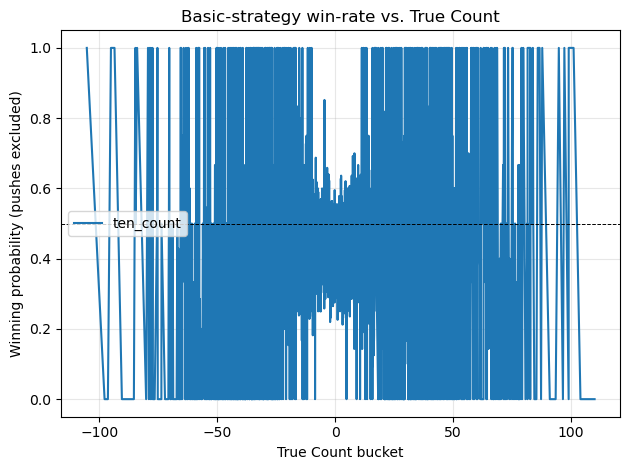

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from basic_strategy_agent import BasicStrategyAgent
from split_environment   import BlackjackEnv
from Supervised_betting  import collect_dictionary
import matplotlib.pyplot as plt
from split_train_agent import train_agent
from DQNAgent import DQNAgent

COUNT_TYPES = ["hi_lo", "zen", "uston_apc", "ten_count"]   # 1-dim systems
N_EPISODES  = 100000                                 # hands per system

plt.figure(figsize=(9,5))

for ct in COUNT_TYPES:
    agent = DQNAgent(count_type=ct)
    agent, env = train_agent(agent, episodes=10000, count_type=ct, print_every=5000)
    stats = collect_dictionary(agent, env, ct, N_EPISODES)

    tc_vals, win_rates = zip(*sorted(
        ((b[0], v[0]) for b, v in stats.items()),
        key=lambda t: t[0]
    ))

    plt.plot(tc_vals, win_rates, label=ct)

plt.axhline(0.5, color='k', ls='--', lw=0.7)
plt.title("Basic-strategy win-rate vs. True Count")
plt.xlabel("True Count bucket")
plt.ylabel("Winning probability (pushes excluded)")
plt.legend()
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()


→ Training & evaluating hi_lo
Episode: 0/10000, Epsilon: 1.00, Loss: 0.0000, Bankroll: 1001, Reward: 1
Model saved to final_models_dc_2/blackjack_agent_finished_model_hi_lo.pth
Episode: 5000/10000, Epsilon: 0.15, Loss: 0.9020, Bankroll: -634, Reward: 0
Episode 1000/1000000 — Last Reward: 0.00 — Count State: (-1.0,)
Episode 2000/1000000 — Last Reward: 1.00 — Count State: (-1.0,)
Episode 3000/1000000 — Last Reward: 1.00 — Count State: (-0.0,)
Episode 4000/1000000 — Last Reward: -1.00 — Count State: (1.0,)
Episode 5000/1000000 — Last Reward: -1.00 — Count State: (-2.0,)
Episode 6000/1000000 — Last Reward: 0.00 — Count State: (-2.0,)
Episode 7000/1000000 — Last Reward: 1.00 — Count State: (0.0,)
Episode 8000/1000000 — Last Reward: 1.00 — Count State: (-2.0,)
Episode 9000/1000000 — Last Reward: -1.00 — Count State: (5.0,)
Episode 10000/1000000 — Last Reward: -1.00 — Count State: (2.0,)
Episode 11000/1000000 — Last Reward: -1.00 — Count State: (-1.0,)
Episode 12000/1000000 — Last Reward: 1.0

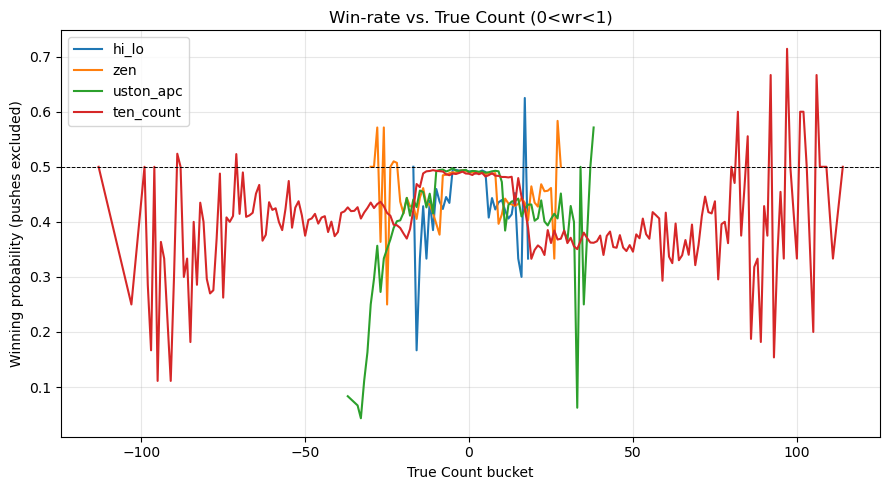

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from DQNAgent import DQNAgent
from split_train_agent import train_agent
from Supervised_betting import collect_dictionary
from split_environment import BlackjackEnv

COUNT_TYPES = ["hi_lo", "zen", "uston_apc", "ten_count"]
N_EPISODES  = 1000000

# 1) collect everything
results = {}

for ct in COUNT_TYPES:
    print(f"→ Training & evaluating {ct}")
    agent = DQNAgent(count_type=ct)
    agent, env = train_agent(agent, episodes=10000, count_type=ct, print_every=5000)
    stats = collect_dictionary(agent, env, ct, N_EPISODES)

    if not stats:
        print(f"   no stats for {ct}, skipping")
        continue

    # unpack into two lists
    raw = sorted(
        ((b[0], v[0]) for b, v in stats.items()),
        key=lambda t: t[0]
    )
    # filter out win_rates == 0 or 1
    filtered = [(tc, wr) for tc, wr in raw if 0 < wr < 1]

    if not filtered:
        print(f"   after filtering extremes, no data for {ct}, skipping")
        continue

    tc_vals, win_rates = zip(*filtered)
    results[ct] = (tc_vals, win_rates)

# 2) now plot once
plt.figure(figsize=(9,5))
for ct, (tc_vals, win_rates) in results.items():
    plt.plot(tc_vals, win_rates, label=ct)

plt.axhline(0.5, color='k', ls='--', lw=0.7)
plt.title("Win‐rate vs. True Count")
plt.xlabel("True Count bucket")
plt.ylabel("Winning probability (pushes excluded)")
plt.legend()
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()



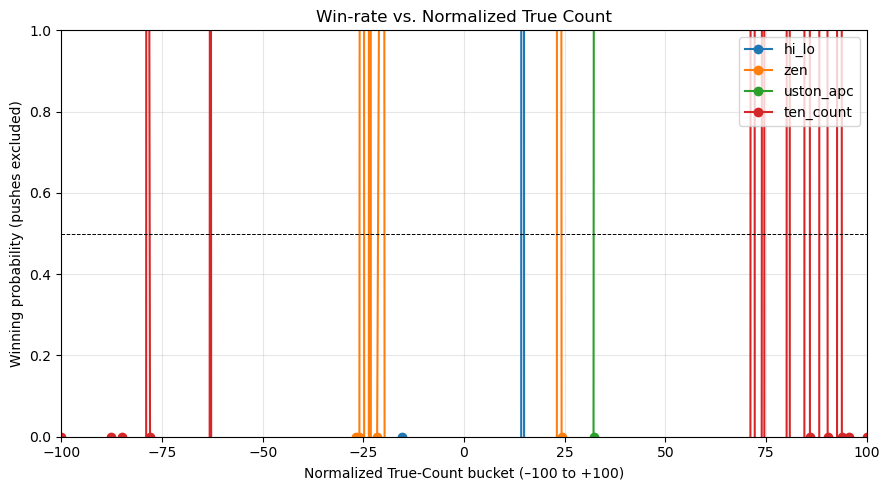

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# `results` is { ct: (tc_vals, win_rates) }
all_tcs = np.concatenate([np.asarray(tc) for tc, _ in results.values()])
min_tc, max_tc = all_tcs.min(), all_tcs.max()

# build normalized-x dict without touching win_rates
norm_results = {}
for ct, (tc_vals, win_rates) in results.items():
    x_norm = np.interp(tc_vals, (min_tc, max_tc), (-100, 100))
    norm_results[ct] = (x_norm, win_rates)   # win_rates unchanged (still 0-1)

# plot
plt.figure(figsize=(9,5))
for ct, (x_norm, win_rates) in norm_results.items():
    plt.plot(x_norm, win_rates, label=ct, marker='o')

plt.axhline(0.5, color='k', ls='--', lw=0.7)
plt.xlabel("Normalized True-Count bucket (–100 to +100)")
plt.ylabel("Winning probability (pushes excluded)")   # still original probabilities
plt.title("Win-rate vs. Normalized True Count")
plt.xlim(-100, 100)      # force full range
plt.ylim(0, 1)           # keep y-axis at original 0-1 scale
plt.legend()
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()
